Sales Data analysis of 12 months

# Libraries in need

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Importing all 12 months data files

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir("./Sales_Data")]

new_data = pd.DataFrame()

for file in files:
    file
    
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    new_data = pd.concat([new_data, df])

new_data.to_csv("merged_sales_data.csv", index=False)

#### Read updated datafile

In [3]:
all_data = pd.read_csv("merged_sales_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Exploration, Cleaning & Manipulation

In [4]:
main_df = all_data.copy()

In [5]:
# Checking & Removing Nan Values
nan_df = main_df[main_df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
main_df.dropna(inplace=True)
main_df.isnull().sum()
main_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
# Adding Extra date Columns
main_df['Order Date'].dtypes
main_df['Order Date'].sample(10)
main_df = main_df[main_df['Order Date'].str[0:2] != 'Or']
main_df['Order Date']=pd.to_datetime(main_df['Order Date'])
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [8]:
main_df['Year'] = pd.DatetimeIndex(main_df['Order Date']).year
main_df['Month'] = pd.DatetimeIndex(main_df['Order Date']).month
main_df['Day'] = pd.DatetimeIndex(main_df['Order Date']).day
main_df['Week'] = pd.DatetimeIndex(main_df['Order Date']).week
main_df['Day Of Week'] = pd.DatetimeIndex(main_df['Order Date']).weekday
main_df['Hour'] = pd.DatetimeIndex(main_df['Order Date']).hour
main_df['Minutes'] = pd.DatetimeIndex(main_df['Order Date']).minute
main_df.drop(columns='Order Date', inplace=True)
main_df

C:\Users\14708\AppData\Local\Temp\ipykernel_25880\1717480340.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  main_df['Week'] = pd.DatetimeIndex(main_df['Order Date']).week


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Day,Week,Day Of Week,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,4,19,16,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,4,7,14,6,22,30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,15,4,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,15,4,14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,4,30,18,1,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019,9,17,38,1,20,56
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,35,6,16,0
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",2019,9,23,39,0,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019,9,19,38,3,17,30


In [9]:
# Converting dtype

main_df['Quantity Ordered']= pd.to_numeric(main_df['Quantity Ordered'])
main_df['Price Each']= pd.to_numeric(main_df['Price Each'])

## Question 1- What was the best month for Sales? What are the numbers?

In [10]:
main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']

# Best Month of Sales

main_df.groupby(['Month']).sum().sort_values(by='Sales', ascending=False)
# Best month for Sales was December with 4613443.34 of Sales that month

,Quantity Ordered,Price Each,Year,Day,Week,Day Of Week,Hour,Minutes,Sales
Month,,,,,,,,,
12,28114,4588415.41,50442696,401453,1182079,73144,359978,733082,4613443.34
10,22703,3715554.83,40949358,326141,849414,59203,290650,598437,3736726.88
4,20558,3367671.02,36905301,282960,286279,52070,262259,544186,3390670.24
11,19798,3180600.68,35479887,272854,811942,54463,254865,518231,3199603.20
5,18667,3135125.13,33446754,264875,331316,49545,238780,487899,3152606.75
3,17005,2791207.83,30593907,241774,170492,48428,218969,447559,2807100.38
7,16072,2632539.56,28857567,227910,410706,40052,206169,417349,2647775.76
6,15253,2562025.61,27365526,209880,329778,42966,195528,402436,2577802.26
8,13448,2230345.42,24149259,192315,396396,37002,172289,353857,2244467.88


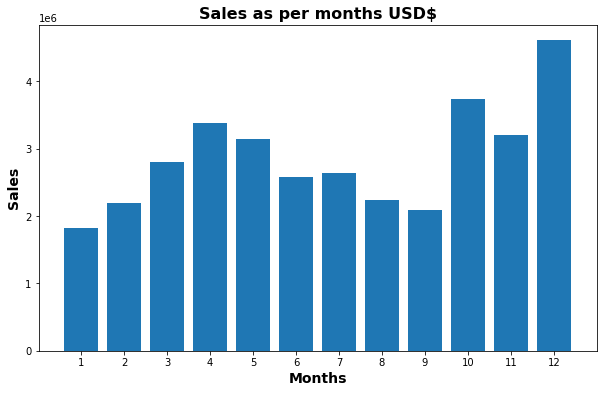

In [11]:
# Plot 
months = range(1,13)
results = main_df.groupby(['Month']).sum()


plt.figure(figsize=(10,6))
plt.title('Sales as per months USD$', fontsize=16, fontweight= 'bold');
plt.xlabel('Months', fontsize=14, fontweight='bold');
plt.ylabel('Sales', fontsize=14, fontweight='bold');
plt.xticks(months);
plt.bar(months, results['Sales']);
plt.show()

# What city had the highest number of sales?

In [12]:
main_df
new_city = main_df['Purchase Address'].str.split(',', n=5, expand=True)
main_df['City'] = new_city[1]
new_state = new_city[2].str.split(' ', n=2, expand=True)
main_df[['State', 'Pincode']] = new_state[[1,2]]
main_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Day,Week,Day Of Week,Hour,Minutes,Sales,City,State,Pincode
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,4,19,16,4,8,46,23.90,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,4,7,14,6,22,30,99.99,Boston,MA,02215
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,15,4,14,38,600.00,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,15,4,14,38,11.99,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,4,30,18,1,9,27,11.99,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019,9,17,38,1,20,56,8.97,Los Angeles,CA,90001
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,35,6,16,0,700.00,San Francisco,CA,94016
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",2019,9,23,39,0,7,39,700.00,San Francisco,CA,94016
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019,9,19,38,3,17,30,379.99,San Francisco,CA,94016


In [13]:
mgrp = main_df.groupby(['City'], as_index=False).sum().sort_values(by='Sales', ascending=False)
mgrp
# San Fransisco saw the maximum sales of $8262203.91 

,City,Quantity Ordered,Price Each,Year,Month,Day,Week,Day Of Week,Hour,Minutes,Sales
7,San Francisco,50239,8211461.74,90313920,315520,702669,1277881,134154,643265,1319477,8262203.91
4,Los Angeles,33289,5421435.23,59772496,208325,469607,843732,88140,427444,866638,5452570.80
5,New York City,27932,4635370.83,50224654,175741,392706,712297,74626,357696,733598,4664317.43
2,Boston,22528,3637409.77,40246750,141112,312376,571147,59403,288225,590442,3661642.01
0,Atlanta,16602,2779908.20,30044739,104794,234837,424716,44691,214264,442932,2795498.58
3,Dallas,16730,2752627.82,29921582,104620,234435,423136,44368,214390,435155,2767975.40
8,Seattle,16553,2733296.01,29743909,104941,229552,425535,44420,213292,436368,2747755.48
6,Portland,14053,2307747.47,25166837,87765,197521,355235,36976,179632,368389,2320490.61
1,Austin,11153,1809873.61,19998197,69829,156782,283184,29488,141946,289060,1819581.75


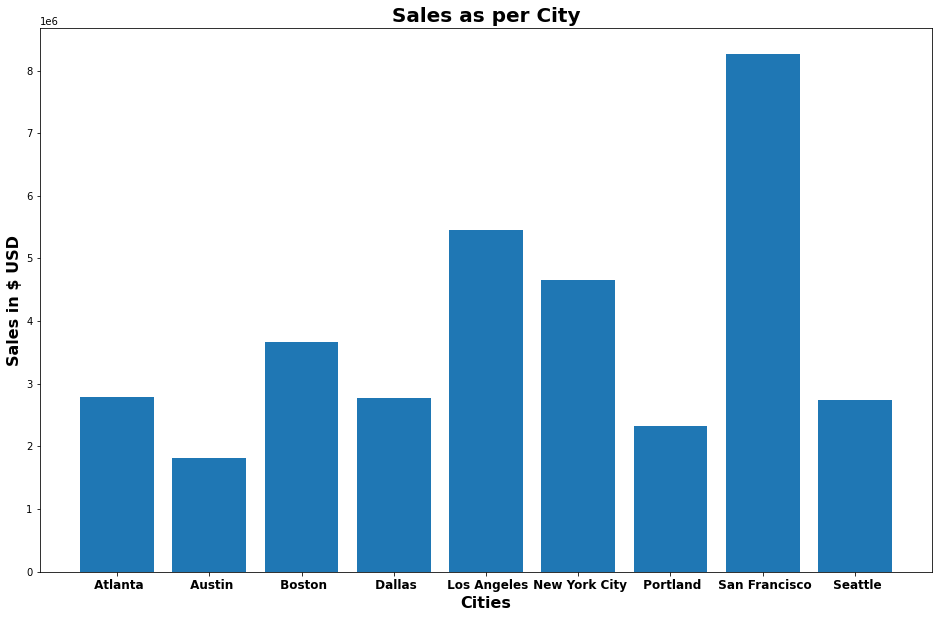

In [14]:
cresults = main_df.groupby(['City'], as_index=False).sum()
cities = cresults['City']

plt.figure(figsize=(16,10));
plt.title('Sales as per City', fontsize=20, fontweight='bold');
plt.xlabel('Cities', fontsize=16, fontweight='bold');
plt.ylabel('Sales in $ USD', fontsize=16, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold')
plt.bar(cities, cresults['Sales']);

In [17]:
main_df['Pincode'].unique()

array(['75001', '02215', '90001', '94016', '98101', '30301', '10001',
       '97035', '73301', '04101'], dtype=object)

# What time should we display advertisements to maximize the customers of buying our product?